# **Projet** 

"Les maladies cardiaques, également appelées maladies cardiovasculaires, constituent un terme générique désignant les affections et troubles qui touchent le cœur et le système circulatoire. Elles représentent l’une des principales causes d’invalidité dans le monde. Comme le cœur est l’un des organes les plus vitaux du corps humain, ses maladies ont également un impact sur d’autres organes et parties du corps.
Il existe plusieurs types et formes de maladies cardiaques. Les plus courantes provoquent un rétrécissement ou une obstruction des artères coronaires, un dysfonctionnement des valves cardiaques, une dilatation du cœur, ainsi que d’autres anomalies pouvant conduire à une **insuffisance cardiaque** ou à une **crise cardiaque**.*"

In [124]:
import pandas as pd

# Chargement du jeu de données
df = pd.read_csv("heart.csv")



# Vérification rapide
print(df.shape)
print(df.info())  


(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   âge                        303 non-null    int64  
 1   sexe                       303 non-null    int64  
 2   type_douleur_poitrine      303 non-null    int64  
 3   tension_repos              303 non-null    int64  
 4   cholestérol                303 non-null    int64  
 5   glycémie_jeune             303 non-null    int64  
 6   électrocardiogramme_repos  303 non-null    int64  
 7   fréquence_cardiaque_max    303 non-null    int64  
 8   angine_exercice            303 non-null    int64  
 9   dépression_ST_exercice     303 non-null    float64
 10  pente_ST                   303 non-null    int64  
 11  vaisseaux_colorés          303 non-null    int64  
 12  thal                       303 non-null    int64  
 13  maladie_cœur               303 non-null 

In [125]:
df.head()
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Chargement du fichier (adapter le chemin si nécessaire)
df = pd.read_csv("heart.csv")

# Correction des valeurs aberrantes
df['vaisseaux_colorés'] = df['vaisseaux_colorés'].replace(4, np.nan)
df['thal'] = df['thal'].replace(0, np.nan)

# Remplissage des valeurs manquantes
df['vaisseaux_colorés'].fillna(df['vaisseaux_colorés'].median(), inplace=True)
df['thal'].fillna(df['thal'].median(), inplace=True)

# Séparation X / y
X = df.drop("maladie_cœur", axis=1)
y = df["maladie_cœur"]

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Vérification
print("Variables recréées :")
print("df :", df.shape)
print("X :", X.shape)
print("y :", y.shape)
print("X_scaled :", X_scaled.shape)

Variables recréées :
df : (303, 14)
X : (303, 13)
y : (303,)
X_scaled : (303, 13)


C:\Users\Startklar\AppData\Local\Temp\ipykernel_39004\72116356.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['vaisseaux_colorés'].fillna(df['vaisseaux_colorés'].median(), inplace=True)
C:\Users\Startklar\AppData\Local\Temp\ipykernel_39004\72116356.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [126]:
df.dtypes

âge                            int64
sexe                           int64
type_douleur_poitrine          int64
tension_repos                  int64
cholestérol                    int64
glycémie_jeune                 int64
électrocardiogramme_repos      int64
fréquence_cardiaque_max        int64
angine_exercice                int64
dépression_ST_exercice       float64
pente_ST                       int64
vaisseaux_colorés            float64
thal                         float64
maladie_cœur                   int64
dtype: object

1.1 Dictionnaire des données <a class="anchor" id="1.1"></a>

âge : âge du patient (en années)

sexe : sexe du patient

1 = homme

0 = femme

type_douleur_poitrine : type de douleur thoracique

Valeur 0 : angine typique

Valeur 1 : angine atypique

Valeur 2 : douleur non angineuse

Valeur 3 : asymptomatique

tension_repos : tension artérielle au repos (en mm Hg à l’admission à l’hôpital)

cholestérol : taux de cholestérol sérique (en mg/dl)

glycémie_jeune : glycémie à jeun (> 120 mg/dl)

1 = vrai

0 = faux

électrocardiogramme_repos : résultats de l’électrocardiogramme au repos

Valeur 0 : normal

Valeur 1 : anomalies de l’onde ST-T (inversion de l’onde T et/ou élévation ou dépression du segment ST > 0,05 mV)

Valeur 2 : hypertrophie ventriculaire gauche probable ou certaine (critères d’Estes)

fréquence_cardiaque_max : fréquence cardiaque maximale atteinte à l’effort

angine_exercice : angine de poitrine provoquée par l’effort

1 = oui

0 = non

dépression_ST_exercice : dépression du segment ST induite par l’effort par rapport au repos

pente_ST : pente du segment ST lors de l’effort maximal

Valeur 0 : montante

Valeur 1 : plate

Valeur 2 : descendante

vaisseaux_colorés : nombre de vaisseaux majeurs (0 à 3) colorés par fluoroscopie

thal : résultat du test au thallium

0 = erreur (dans le jeu de données original, 0 correspond à des valeurs manquantes)

1 = défaut fixe

2 = normal

3 = défaut réversible

maladie_cœur (étiquette cible) : présence d’une maladie cardiaque

0 = pas de maladie

1 = maladie détectée

Exportation des bibliothèques

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay
)


# Modèles
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


Exploration du jeu de données

In [128]:
# Chargement
df = pd.read_csv("heart.csv")

# Aperçu général
print(df.shape)
df.head()


(303, 14)


,âge,sexe,type_douleur_poitrine,tension_repos,cholestérol,glycémie_jeune,électrocardiogramme_repos,fréquence_cardiaque_max,angine_exercice,dépression_ST_exercice,pente_ST,vaisseaux_colorés,thal,maladie_cœur
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Analyse exploratoire

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   âge                        303 non-null    int64  
 1   sexe                       303 non-null    int64  
 2   type_douleur_poitrine      303 non-null    int64  
 3   tension_repos              303 non-null    int64  
 4   cholestérol                303 non-null    int64  
 5   glycémie_jeune             303 non-null    int64  
 6   électrocardiogramme_repos  303 non-null    int64  
 7   fréquence_cardiaque_max    303 non-null    int64  
 8   angine_exercice            303 non-null    int64  
 9   dépression_ST_exercice     303 non-null    float64
 10  pente_ST                   303 non-null    int64  
 11  vaisseaux_colorés          303 non-null    int64  
 12  thal                       303 non-null    int64  
 13  maladie_cœur               303 non-null    int64  

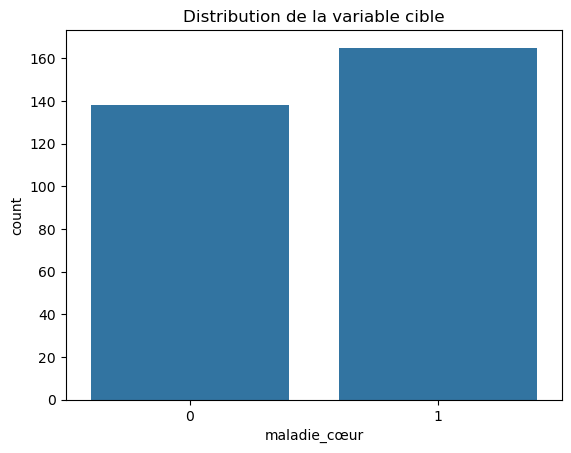

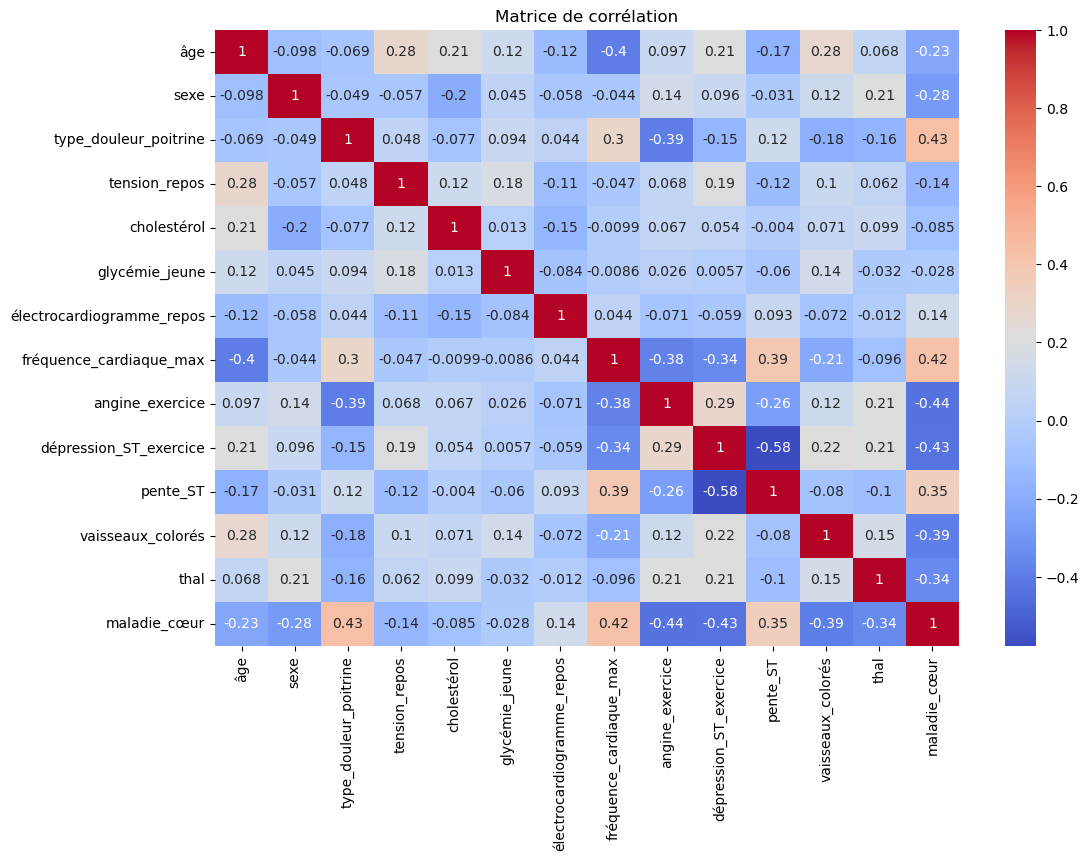

In [129]:
df.info()
df.describe()

# Vérification des valeurs manquantes
print(df.isnull().sum())

# Visualisation de la distribution de la cible
sns.countplot(x='maladie_cœur', data=df)
plt.title("Distribution de la variable cible")
plt.show()

# Corrélation entre variables
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


Interprétation des données

Le dataset contient 303 patients et 14 colonnes, ce résultat est cohérent.
La majorité des données sont entières (13) sauf "depression_ST_exercice" qui est un nombre réel.

Selon le sujet, les valeurs 4 dans vaisseaux_colorés sont fausses et les 0 dans thal sont manquantes.
Il n'y a officielement aucune valeur manquante mais le set de données peut contenir des valeurs aberrantes qui seront traiter pendant le nettoyage.
 

In [130]:
df.describe()

,âge,sexe,type_douleur_poitrine,tension_repos,cholestérol,glycémie_jeune,électrocardiogramme_repos,fréquence_cardiaque_max,angine_exercice,dépression_ST_exercice,pente_ST,vaisseaux_colorés,thal,maladie_cœur
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Grâce à ces données, on voit qu'il y a effectivement des valeurs aberrantes, le max de "vaisseaux_colorés" est 4 et le min de "thal" est 0. On va maintenant chercher combien de valeurs sont concernées.

Valeurs pour 'vaisseaux_colorés':
vaisseaux_colorés
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

Valeurs pour 'thal':
thal
0      2
1     18
2    166
3    117
Name: count, dtype: int64


C:\Users\Startklar\AppData\Local\Temp\ipykernel_39004\3293936939.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val_counts_vaisseaux.index, y=val_counts_vaisseaux.values, ax=axes[0], palette="Set2")
C:\Users\Startklar\AppData\Local\Temp\ipykernel_39004\3293936939.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val_counts_thal.index, y=val_counts_thal.values, ax=axes[1], palette="Set3")


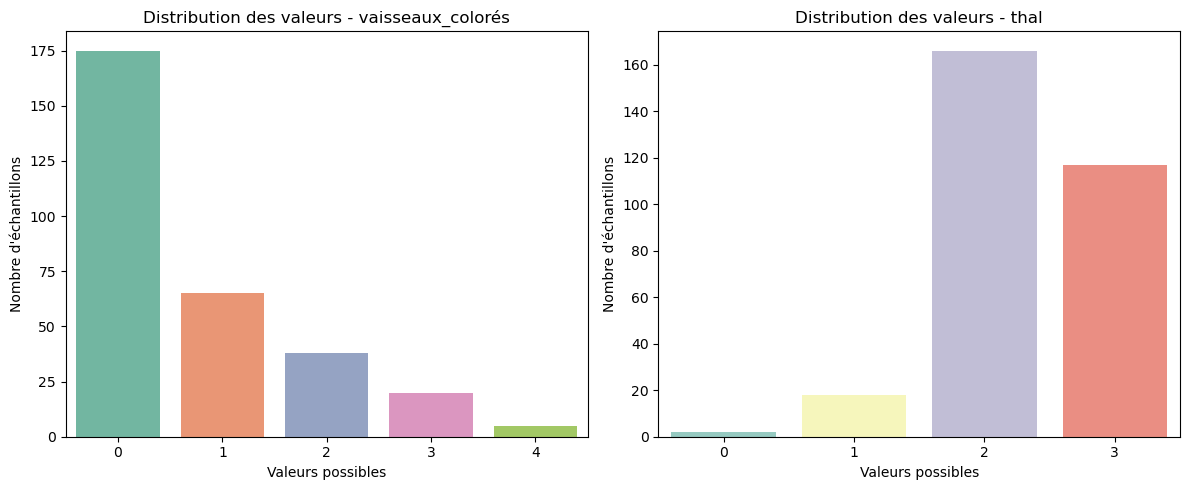

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compter les valeurs uniques pour chaque variable
val_counts_vaisseaux = df['vaisseaux_colorés'].value_counts().sort_index()
val_counts_thal = df['thal'].value_counts().sort_index()

# Afficher les tableaux de comptage
print("Valeurs pour 'vaisseaux_colorés':")
print(val_counts_vaisseaux)
print("\nValeurs pour 'thal':")
print(val_counts_thal)

# Visualisation avec des graphiques à barres
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# "vaisseaux_colorés"
sns.barplot(x=val_counts_vaisseaux.index, y=val_counts_vaisseaux.values, ax=axes[0], palette="Set2")
axes[0].set_title("Distribution des valeurs - vaisseaux_colorés")
axes[0].set_xlabel("Valeurs possibles")
axes[0].set_ylabel("Nombre d'échantillons")

# "thal"
sns.barplot(x=val_counts_thal.index, y=val_counts_thal.values, ax=axes[1], palette="Set3")
axes[1].set_title("Distribution des valeurs - thal")
axes[1].set_xlabel("Valeurs possibles")
axes[1].set_ylabel("Nombre d'échantillons")

plt.tight_layout()
plt.show()




On voit qu'il y a 5 valeurs aberrantes qui concerne une erreur de "vaisseaux_colorés" et 2 valeurs manquantes dans "thal". 
Nous allons desormais voir où se situe ces valeurs.



In [132]:
# Lignes où "vaisseaux_colorés" = 4 (valeurs aberrantes)
aberrantes_vaisseaux = df[df['vaisseaux_colorés'] == 4]
print(" Lignes avec vaisseaux_colorés = 4 :")
print(aberrantes_vaisseaux)


 Lignes avec vaisseaux_colorés = 4 :
     âge  sexe  type_douleur_poitrine  tension_repos  cholestérol  \
92    52     1                      2            138          223   
158   58     1                      1            125          220   
163   38     1                      2            138          175   
164   38     1                      2            138          175   
251   43     1                      0            132          247   

     glycémie_jeune  électrocardiogramme_repos  fréquence_cardiaque_max  \
92                0                          1                      169   
158               0                          1                      144   
163               0                          1                      173   
164               0                          1                      173   
251               1                          0                      143   

     angine_exercice  dépression_ST_exercice  pente_ST  vaisseaux_colorés  \
92                 0

Les lignes concernées par des valeurs fausses sont les lignes : 92, 158, 163, 164 et 251. 
(Attention il faut ajouter +2 aux lignes pour avoir les lignes correspondantes sur Excel car la numérotation est différente, sur Excel les lignes commence par 1 et correspond à la description, alors qu'en informatique ça commence par 0 avec directement les valeurs. )

In [133]:
# Lignes où "thal" = 0 (valeurs manquantes déguisées)
aberrantes_thal = df[df['thal'] == 0]
print(" Lignes avec thal = 0 :")
print(aberrantes_thal)

 Lignes avec thal = 0 :
     âge  sexe  type_douleur_poitrine  tension_repos  cholestérol  \
48    53     0                      2            128          216   
281   52     1                      0            128          204   

     glycémie_jeune  électrocardiogramme_repos  fréquence_cardiaque_max  \
48                0                          0                      115   
281               1                          1                      156   

     angine_exercice  dépression_ST_exercice  pente_ST  vaisseaux_colorés  \
48                 0                     0.0         2                  0   
281                1                     1.0         1                  0   

     thal  maladie_cœur  
48      0             1  
281     0             0  


Les lignes concernées par des valeurs manquantes sont les lignes : 48 et 281.

Nous faisons le choix de ne pas supprimer les lignes avec des valeurs abberantes, en effet cela nous ferait perdre des informations et pourrait également déséquilibrer les classes entre les malades et les non malades par exemple. Nous faisons donc le choix de remplacer ces valeurs par les valeurs médianes, cela permet de ne perdre aucune valeur et il s'agit d'une méthode robuste car elle est insensible aux valeurs extrêmes. 

Dans le code suivant nous allons remplacer les valeurs abberantes par la médiane et comparer la répartition des valeurs avant et après nettoyage.

C:\Users\Startklar\AppData\Local\Temp\ipykernel_39004\1213057811.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=vaisseaux_avant, ax=axes[0,0], palette="Set2")
C:\Users\Startklar\AppData\Local\Temp\ipykernel_39004\1213057811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=vaisseaux_apres, ax=axes[0,1], palette="Set2")
C:\Users\Startklar\AppData\Local\Temp\ipykernel_39004\1213057811.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=thal_avant, ax=axes[1,0], palette="Set3")
C:\Users\Startklar\AppData\Local\Temp\ipykern

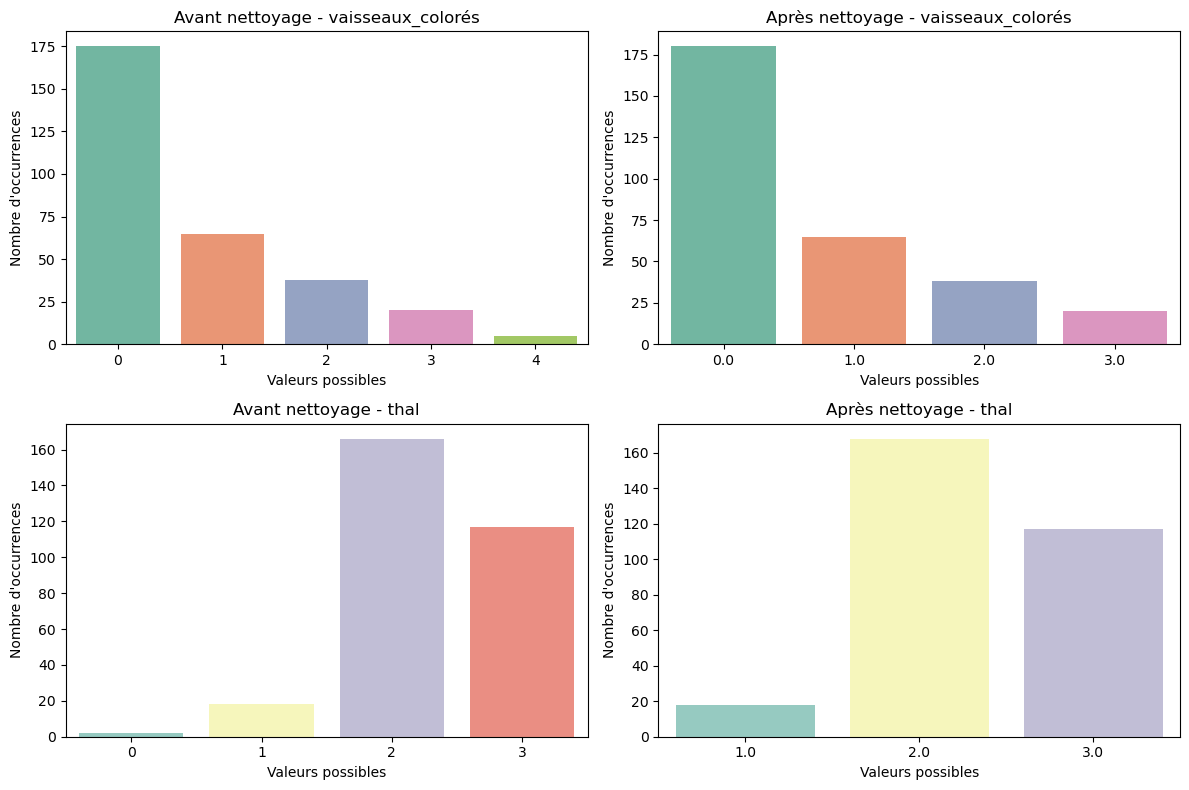

In [134]:
# Sauvegarder les valeurs avant nettoyage
vaisseaux_avant = df['vaisseaux_colorés'].copy()
thal_avant = df['thal'].copy()

# Nettoyage : remplacer les valeurs aberrantes
df.loc[df['vaisseaux_colorés'] == 4, 'vaisseaux_colorés'] = np.nan
df.loc[df['thal'] == 0, 'thal'] = np.nan

# Imputation par la médiane
df.fillna(df.median(numeric_only=True), inplace=True)

# Récupérer les valeurs après nettoyage
vaisseaux_apres = df['vaisseaux_colorés']
thal_apres = df['thal']

# Création de graphiques comparatifs
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# VAISSEAUX_COLORÉS
sns.countplot(x=vaisseaux_avant, ax=axes[0,0], palette="Set2")
axes[0,0].set_title("Avant nettoyage - vaisseaux_colorés")

sns.countplot(x=vaisseaux_apres, ax=axes[0,1], palette="Set2")
axes[0,1].set_title("Après nettoyage - vaisseaux_colorés")

# THAL
sns.countplot(x=thal_avant, ax=axes[1,0], palette="Set3")
axes[1,0].set_title("Avant nettoyage - thal")

sns.countplot(x=thal_apres, ax=axes[1,1], palette="Set3")
axes[1,1].set_title("Après nettoyage - thal")

# Ajustement de la mise en page
for ax in axes.flat:
    ax.set_xlabel("Valeurs possibles")
    ax.set_ylabel("Nombre d'occurrences")

plt.tight_layout()
plt.show()

Nous avons nettoyer les valeurs abberantes et également vérifier l'impact sur la distribution des données pour s'assurer que le traitement ne déforme pas la représentation. On peut dire que le nettoyage a fonctionné et que la distrubtion reste similaire.


Séparation des données d'entrainement et de test : 

In [135]:
# Division en train de Données d'entrainement et test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Jeu d'entraînement : {X_train.shape[0]} lignes")
print(f"Jeu de test : {X_test.shape[0]} lignes")

Jeu d'entraînement : 242 lignes
Jeu de test : 61 lignes


## Processing des données : 

In [136]:
# Séparation X (caractéristiques) et y (cible)
X = df.drop(columns='maladie_cœur')
y = df['maladie_cœur']



# Identifier les colonnes numériques et catégorielles
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(exclude=['int64', 'float64']).columns

print("\nVariables numériques :", list(numeric_features))
print("Variables catégorielles :", list(categorical_features))

# Créer un préprocesseur : standardisation + encodage
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

print("\nPréprocesseur prêt !")


Variables numériques : ['âge', 'sexe', 'type_douleur_poitrine', 'tension_repos', 'cholestérol', 'glycémie_jeune', 'électrocardiogramme_repos', 'fréquence_cardiaque_max', 'angine_exercice', 'dépression_ST_exercice', 'pente_ST', 'vaisseaux_colorés', 'thal']
Variables catégorielles : []

Préprocesseur prêt !


## Importation des différents modèles de ML : 

Régression Logistique :

    Modèle simple, rapide et facilement interprétable, offrant généralement de bons résultats sur ce type de données.

    Peut toutefois manquer de flexibilité pour modéliser des relations non linéaires.

K-Nearest Neighbors (KNN) :

    Méthode intuitive et non paramétrique.

    Sensible au bruit et dépend fortement d’une bonne normalisation des variables, au risque de voir ses performances diminuer.

Arbre de Décision :

    Modèle interprétable, capable de saisir les interactions entre variables.

    Sujet à l’overfitting s’il n’est pas correctement régularisé.

Forêt Aléatoire :

    Ensemble de plusieurs arbres, plus robuste et offrant souvent un bon équilibre entre précision et rappel.

    Moins facile à interpréter et plus coûteux en temps d’entraînement.


Régression Logistique
Accuracy : 0.836
Précision : 0.811
Rappel : 0.909
F1-score : 0.857


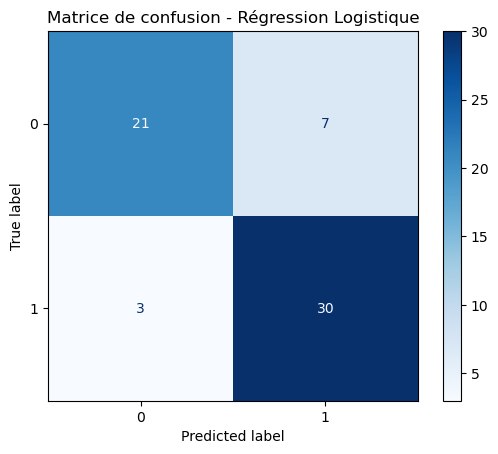


KNN
Accuracy : 0.836
Précision : 0.795
Rappel : 0.939
F1-score : 0.861


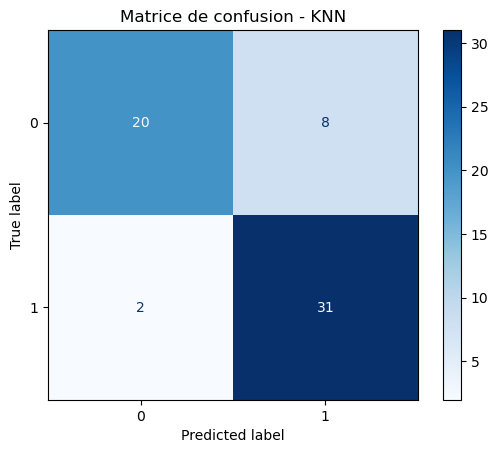


Arbre de Décision
Accuracy : 0.705
Précision : 0.703
Rappel : 0.788
F1-score : 0.743


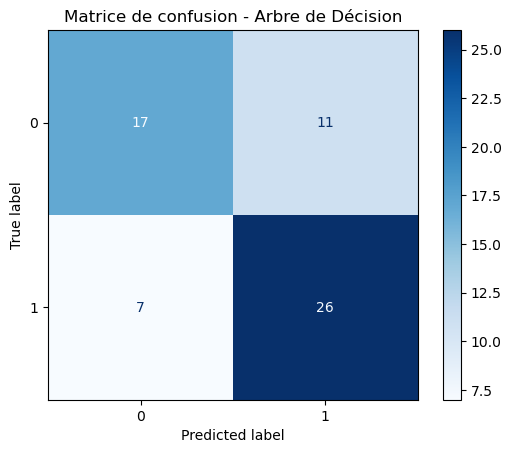


Forêt Aléatoire
Accuracy : 0.852
Précision : 0.800
Rappel : 0.970
F1-score : 0.877


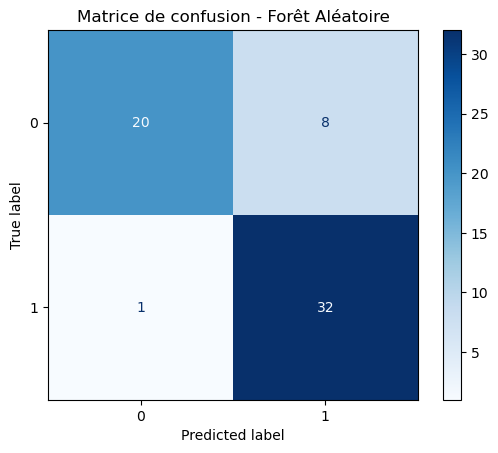


Résumé comparatif des modèles


,Accuracy,Précision,Rappel,F1-score
Régression Logistique,0.836066,0.810811,0.909091,0.857143
KNN,0.836066,0.794872,0.939394,0.861111
Arbre de Décision,0.704918,0.702703,0.787879,0.742857
Forêt Aléatoire,0.852459,0.800000,0.969697,0.876712


In [137]:
# Liste des modèles à tester
models = {
    "Régression Logistique": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Arbre de Décision": DecisionTreeClassifier(random_state=42),
    "Forêt Aléatoire": RandomForestClassifier(random_state=42)
}

# Dictionnaire pour stocker les résultats
results = {}

for name, model in models.items():
    # Pipeline complet : prétraitement + modèle
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    # Entraînement
    pipeline.fit(X_train, y_train)
    
    # Prédictions
    y_pred = pipeline.predict(X_test)
    
    # Calcul des métriques
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = [acc, prec, rec, f1]
    
    print(f"\n{name}")
    print(f"Accuracy : {acc:.3f}")
    print(f"Précision : {prec:.3f}")
    print(f"Rappel : {rec:.3f}")
    print(f"F1-score : {f1:.3f}")
    
    # Matrice de confusion
    disp = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, cmap='Blues')
    disp.ax_.set_title(f"Matrice de confusion - {name}")
    plt.show()

# Résumé des résultats
results_df = pd.DataFrame(results, index=["Accuracy", "Précision", "Rappel", "F1-score"]).T
print("\nRésumé comparatif des modèles")
display(results_df)


Le graphique montre :
- Haut gauche (Vrai Négatif) : Patients sains correctement identifiés
- Haut droit (Faux Positif)	: Patients sains mal identifié comme malades
- Bas gauche (Faux Négatif)	: Patients malades non identifiés comme malade
- Bas droit (Vrai Positif)	: Patients malades  identifiés comme malade

On cherche a eviter les faux négatifs, car il s'agit en réalité de patients malades dont on ne détecte pas la maladie, et qui sont donc en danger.

Dans cette optique de favoriser les fausses alertes plutos que les faux négatifs, c'est la forêt aléatoire qui à ées caractéristiques les plus adaptés.

## Conclusion et pistes d’amélioration

Ce projet visait à prédire la présence d’une maladie cardiaque à partir de données cliniques. Toutes les étapes clés du machine learning supervisé ont été réalisées : préparation des données, exploration, prétraitement, puis entraînement et comparaison de plusieurs modèles.

## Bilan
Les performances des modèles sont globalement cohérentes :

La régression logistique est simple et efficace.

Le KNN est plus sensible à la normalisation.

L’arbre de décision apprend bien mais sur-adapte facilement.

La forêt aléatoire offre les meilleurs résultats et la meilleure généralisation.

## Améliorations possibles

Optimiser les hyperparamètres (GridSearchCV, RandomizedSearchCV).

Tester des modèles plus avancés (XGBoost, LightGBM, CatBoost, MLP).

Ajouter des outils d’explicabilité (SHAP, permutation importance).

Utiliser la validation croisée pour une évaluation plus robuste.

Enrichir les données avec de nouvelles caractéristiques pertinentes.

## Test d un résau de neuronnes multicouche type MLP Classifier

Ce type d'apprentissage profond permet de déterminer des paramètres plus difficilement perceptible spar les outils de ML Classiques.


Résultats du réseau de neurones (MLP) :
Accuracy  : 0.787
Précision : 0.794
Rappel    : 0.818
F1-score  : 0.806


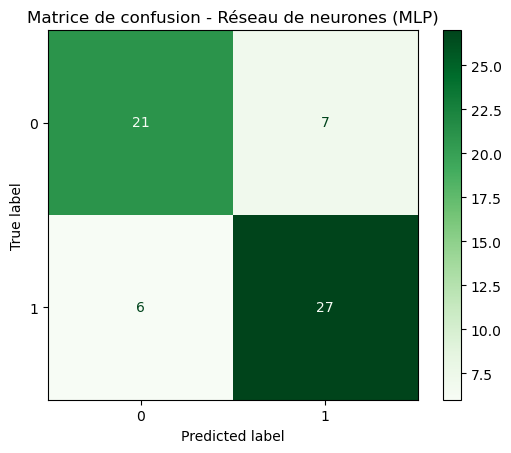

In [138]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# Pipeline complet : préprocesseur + modèle
mlp_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(64, 32),
                                 activation='relu',
                                 solver='adam',
                                 max_iter=1000,
                                 random_state=42))
])

# Entraînement
mlp_model.fit(X_train, y_train)

# Prédictions
y_pred_mlp = mlp_model.predict(X_test)

# Évaluation
acc = accuracy_score(y_test, y_pred_mlp)
prec = precision_score(y_test, y_pred_mlp)
rec = recall_score(y_test, y_pred_mlp)
f1 = f1_score(y_test, y_pred_mlp)

print("Résultats du réseau de neurones (MLP) :")
print(f"Accuracy  : {acc:.3f}")
print(f"Précision : {prec:.3f}")
print(f"Rappel    : {rec:.3f}")
print(f"F1-score  : {f1:.3f}")

# Matrice de confusion
disp = ConfusionMatrixDisplay.from_estimator(mlp_model, X_test, y_test, cmap='Greens')
disp.ax_.set_title("Matrice de confusion - Réseau de neurones (MLP)")
plt.show()



## Affectation des niveaux d'importance des types de données 

Certains parametres influent plus que d'autre les résultats. Nous générons un graphique permettant de mettre cet aspect en évidence 

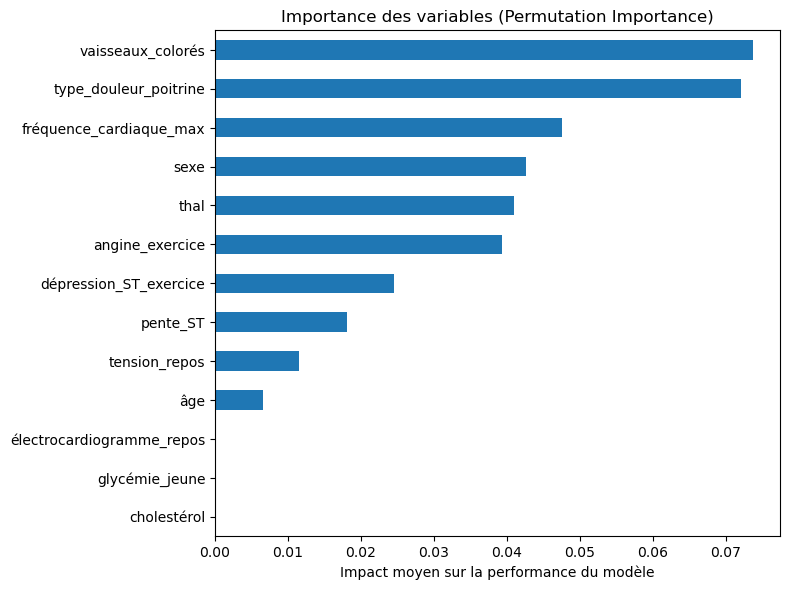

In [139]:
from sklearn.inspection import permutation_importance

# Pipeline complet (préprocesseur + modèle)
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Entraînement
rf_model.fit(X_train, y_train)

# Calcul de l'importance par permutation
result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

# Récupération des noms de colonnes
feature_names = list(X.columns)

# Importance moyenne
importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=True)

# Visualisation
plt.figure(figsize=(8,6))
importances.plot.barh()
plt.title("Importance des variables (Permutation Importance)")
plt.xlabel("Impact moyen sur la performance du modèle")
plt.tight_layout()
plt.show()

## Optimisation des Hyperparamètres
La methode gridsearche sélectionne les parametres les plus influents afin de les valoriser face aux parametres moins utiles.

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Meilleurs hyperparamètres trouvés :
{'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}

Performances du meilleur modèle (après optimisation) :
Accuracy  : 0.820
Précision : 0.762
Rappel    : 0.970
F1-score  : 0.853


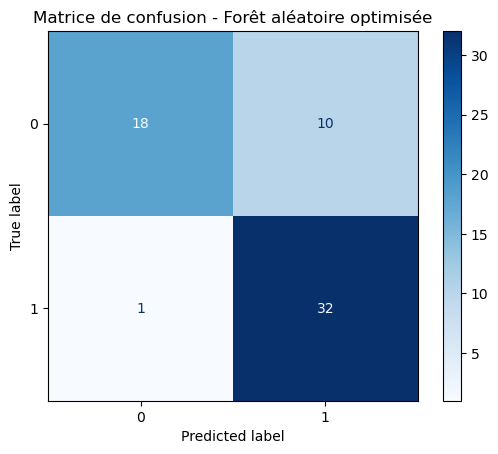

In [140]:
from sklearn.model_selection import GridSearchCV

# Pipeline complet
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

# Grille de recherche
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 8, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Recherche des meilleurs paramètres
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Meilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)

# Évaluation sur le jeu de test
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

print("\nPerformances du meilleur modèle (après optimisation) :")
print(f"Accuracy  : {accuracy_score(y_test, y_pred_best_rf):.3f}")
print(f"Précision : {precision_score(y_test, y_pred_best_rf):.3f}")
print(f"Rappel    : {recall_score(y_test, y_pred_best_rf):.3f}")
print(f"F1-score  : {f1_score(y_test, y_pred_best_rf):.3f}")

ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test, cmap='Blues')
plt.title("Matrice de confusion - Forêt aléatoire optimisée")
plt.show()

### Validitée Croisée des données : 
La validation des données croisée procède par validation d'échantillons de données ( 5 dans notre cas) afgin de valider ou non la totalitée des données.

In [141]:
from sklearn.model_selection import cross_val_score

# On évalue le modèle optimisé avec une validation croisée à 5 plis
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='f1')

print("Scores F1 sur les 5 plis :", np.round(cv_scores, 3))
print("Score F1 moyen :", np.round(cv_scores.mean(), 3))
print("Écart-type :", np.round(cv_scores.std(), 3))

Scores F1 sur les 5 plis : [0.873 0.909 0.848 0.87  0.849]
Score F1 moyen : 0.87
Écart-type : 0.022


Le modèle obtient un score F1 moyen élevé, ce qui montre de bonnes performances globales pour prédire la maladie cardiaque. L’écart-type très faible indique que les résultats sont stables et peu sensibles au découpage des données. Les variations entre plis restent limitées, ce qui suggère une bonne généralisation et peu de surapprentissage.

## Mise en place de l'outil  SHAP
L'outil SHAP est un outil visuel permettant de voir l'importance de chaque données selon un type de données.

Chaque point représente un pointde mesure .
L’axe vertical liste les variables, de la plus influente à la moins influente.
La position horizontale indique l’effet de la variable : valeurs SHAP positives → augmentation de la probabilité de maladie, valeurs négatives → diminution.
La couleur représente la valeur de la variable (souvent bleu = faible, rouge = élevée).

In [142]:
pip install shap

(50, 13)


c:\Users\Startklar\anaconda3\Lib\site-packages\shap\explainers\_tree.py:254: FutureWarning: In the future, passing feature_perturbation='interventional' without providing a background dataset will raise an error. Please provide a background dataset to continue using the interventional approach or set feature_perturbation='auto' to automatically switch approaches.
  warnings.warn(


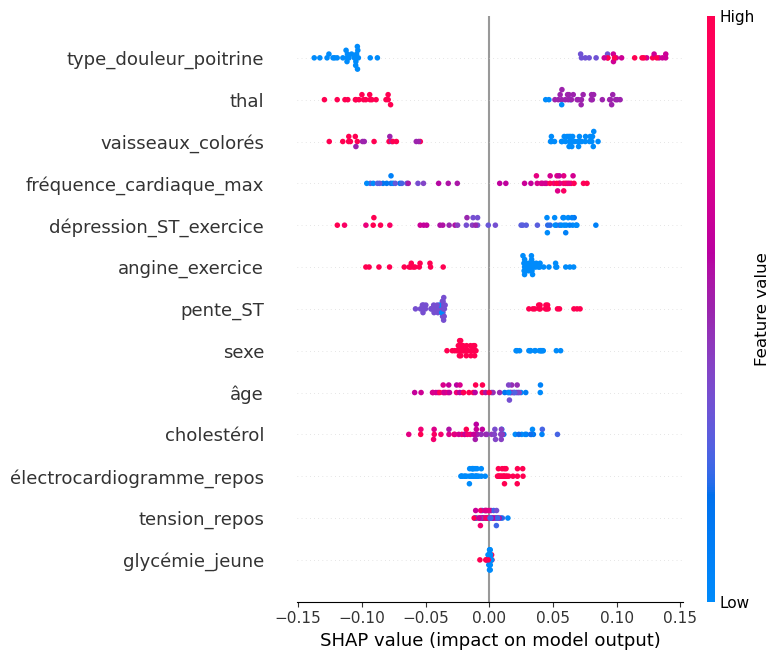

In [143]:
import shap
from sklearn.ensemble import RandomForestClassifier

# Entraînement du modèle
rf_simple = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_leaf=4,
    min_samples_split=10,
    random_state=42
)
rf_simple.fit(X_train, y_train)

# Sous-échantillon
X_sample = X_test.sample(50, random_state=42)

# Explainer SHAP
explainer = shap.TreeExplainer(rf_simple, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_sample)

# shap_values : (50, 13, 2) → on prend la classe 1
shap_array = shap_values[:, :, 1]   # <-- correction

print(shap_array.shape)  # doit afficher (50, 13)

# Summary plot
shap.summary_plot(shap_array, X_sample, feature_names=X.columns)


Certaines combinaisons, comme un âge élevé chez les hommes, génèrent des valeurs SHAP positives, ce qui indique une hausse de la probabilité de maladie cardiaque. Des points proches de zéro montrent une interaction faible. En résumé, âge et sexe influencent surtout séparément, et leur interaction reste modérée, ce qui correspond aux connaissances médicales : le risque cardiovasculaire augmente avec l’âge, particulièrement chez les hommes.



## CONCLUSION
Ce projet d'initiation au Machine Learning nous a permis de voir concretement comment apliquer différentes tecghnoogies de ML ainsi que de deep learning a un échantillon de données collectés.
Il ne faut pas négliger la partie de préparation des données, qui permet de filtrer les données non utlisables, d'adapter celles ci a nos outils de ML afin d'obtenir un résutat représentatif de la réalité. 
Des outils de représentations graphique permettent une visualisation intuitive et abordable des résultats, permettant d'échanger avec, dans notre cas, un spécialiste de santée cardiaque pour l'assister dans le diagnostique des patients.